In [1]:
import numpy as np

import gzip
import os

import matplotlib.pyplot as plt
import cv2

import glob

from sklearn.model_selection import train_test_split

In [2]:
#infected_paths = sorted(os.listdir('../input/cell_images/cell_images/Parasitized/'))
#uninfected_paths = sorted(os.listdir('../input/cell_images/cell_images/Uninfected/'))

#infected_arr = []
#uninfected_arr = []
def load_data(data_path, target_size=(128,128)):
    img_arr_img = []

    filelist_img = glob.glob(data_path+"*.png")

    for image_path in sorted(filelist_img):
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=target_size)#interpolation=cv2.INTER_CUBIC) #/255.0
            #cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img)
    
    

In [3]:
path_infected = '/kaggle/input/cell_images/cell_images/Parasitized/'
path_uninfected = '/kaggle/input/cell_images/cell_images/Uninfected/'

X_infected = load_data(path_infected)
X_uninfected = load_data(path_uninfected)

In [4]:
# We stack vertically X_infected and X_uninfected to make the data tensor X
X = np.vstack((X_uninfected, X_infected))

# Let's create the labels vector
# 0 stands for not infected
# 1 stands for infected
labels = [0]*X_uninfected.shape[0] + [1]*X_infected.shape[0]

# We need to separate the data into train and test arrays 
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.1,random_state=42)


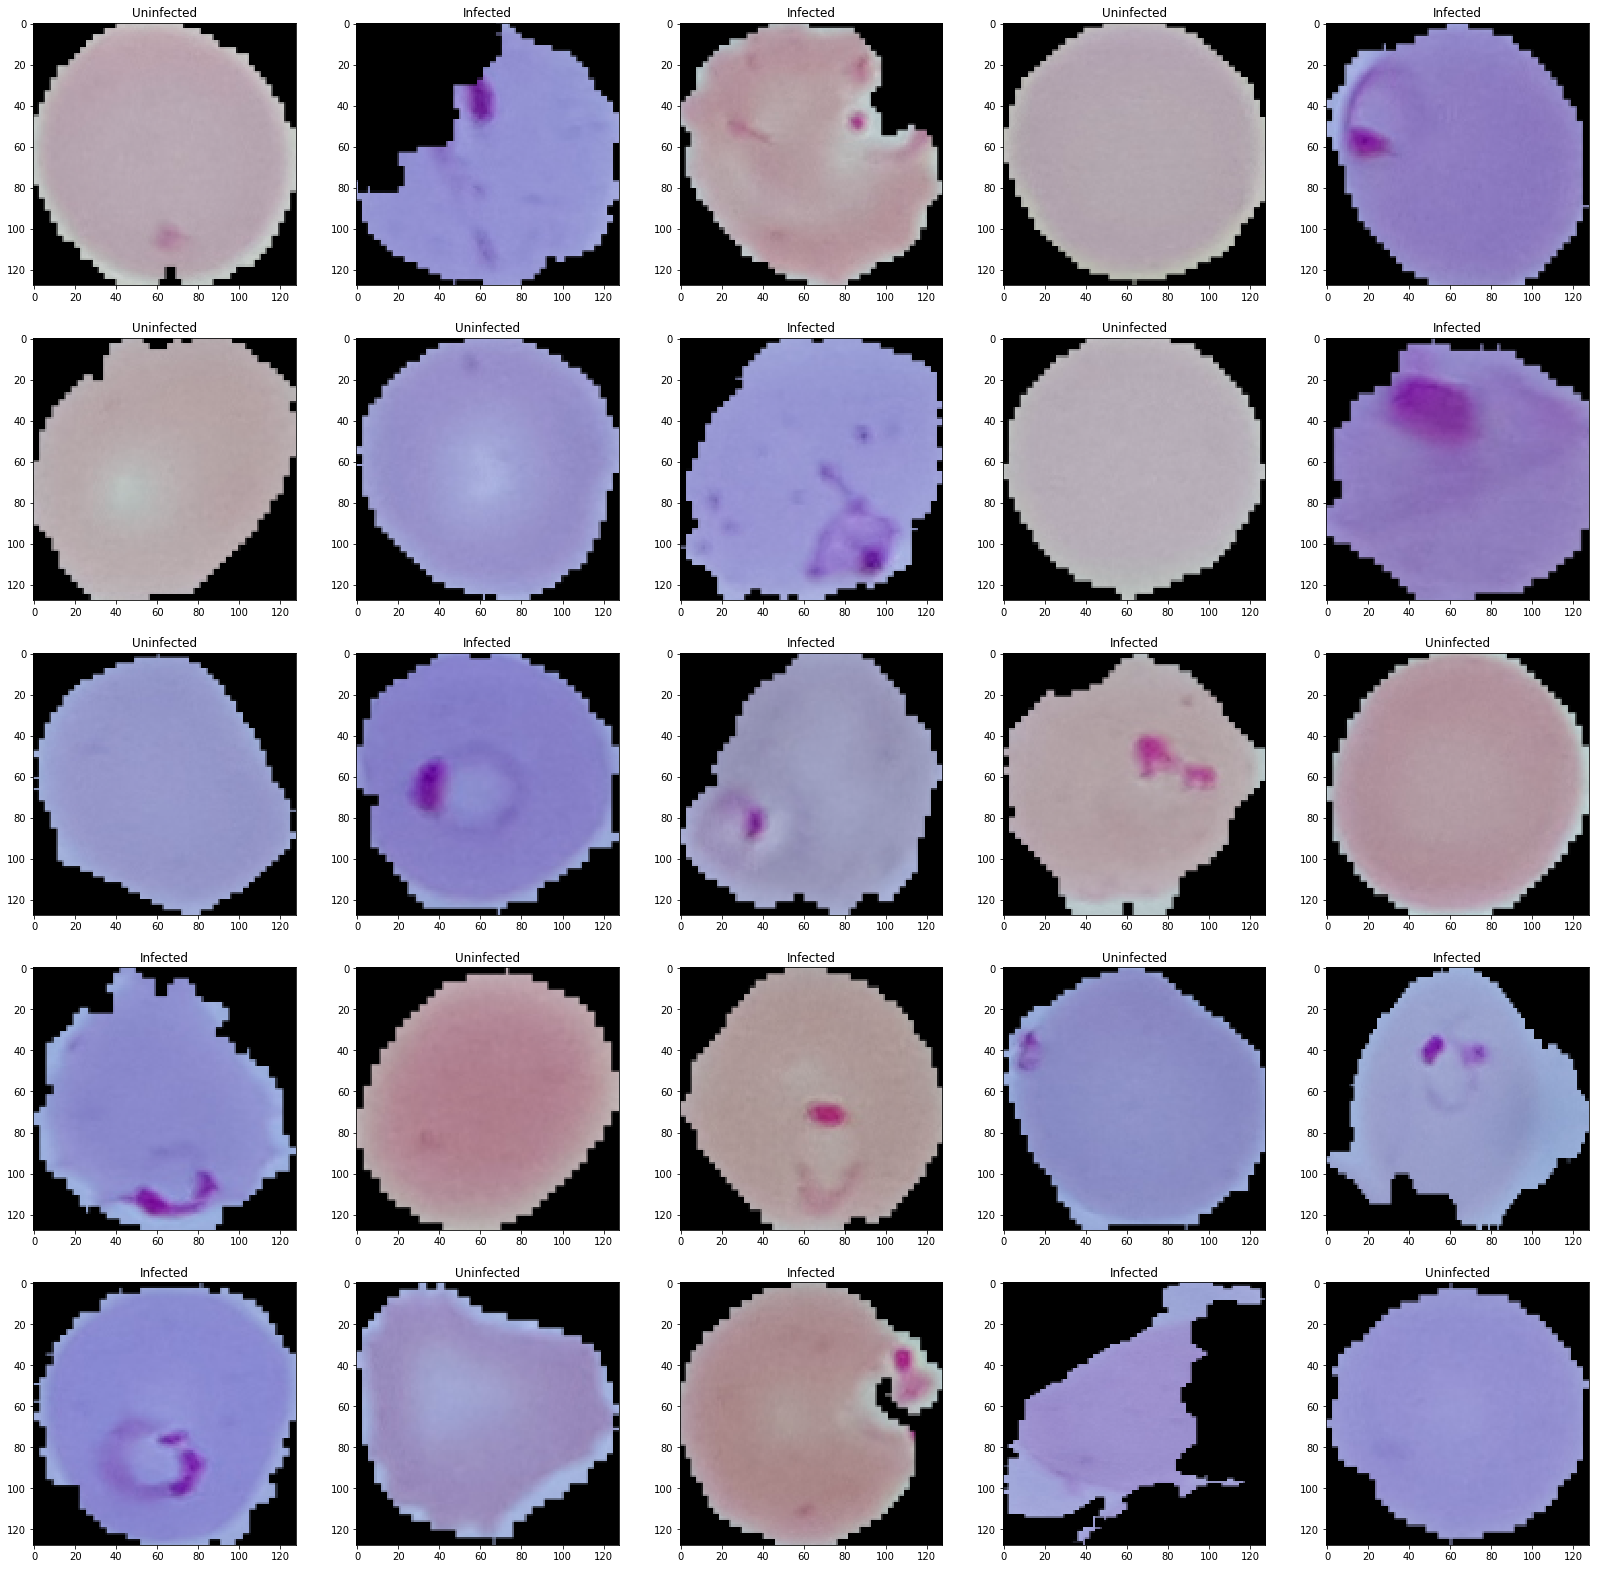

In [5]:
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Uninfected')
    else:
        plt.title('Infected')
    
plt.show()


In [6]:
from keras.datasets import mnist

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import numpy as np
import pandas as pd
import cv2

import os
import glob

import time


K.set_image_data_format('channels_last')
np.random.seed(0)

def create_model(input_shape, with_summary):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(20, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(30, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(Conv2D(500, kernel_size=3, padding="same", activation = 'relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #model.add(Conv2D(1024, kernel_size=3, padding="valid", activation = 'relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=30, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=5, activation='relu'))
    #model.add(Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    if with_summary:
        model.summary()

    return model

Using TensorFlow backend.


In [7]:
input_shape = (128, 128, 3)
model = create_model(input_shape=input_shape, with_summary=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 10)      760       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)              0         
__________

In [8]:
hist = model.fit(X_train, y_train,batch_size=512,epochs=20)

Epoch 1/20
24802/24802 [==============================] - 22s 899us/step - loss: 0.8615 - acc: 0.5432
Epoch 2/20
24802/24802 [==============================] - 17s 686us/step - loss: 0.6393 - acc: 0.6181
Epoch 3/20
24802/24802 [==============================] - 17s 685us/step - loss: 0.5655 - acc: 0.6980
Epoch 4/20
24802/24802 [==============================] - 17s 684us/step - loss: 0.4449 - acc: 0.7951
Epoch 5/20
24802/24802 [==============================] - 17s 686us/step - loss: 0.3403 - acc: 0.8672
Epoch 6/20
24802/24802 [==============================] - 17s 686us/step - loss: 0.2765 - acc: 0.9002
Epoch 7/20
24802/24802 [==============================] - 17s 688us/step - loss: 0.2332 - acc: 0.9193
Epoch 8/20
24802/24802 [==============================] - 17s 688us/step - loss: 0.2004 - acc: 0.9286
Epoch 9/20
24802/24802 [==============================] - 17s 686us/step - loss: 0.1709 - acc: 0.9377
Epoch 10/20
24802/24802 [==============================] - 17s 688us/step - loss: 

In [9]:
model.evaluate(X_test, y_test)

2756/2756 [==============================] - 1s 354us/step


[0.2189086735686517, 0.9444847605224964]

# The Convolutionnal neural network managed to reach 97% accuracy on the images it trained on. After evaluating its performance on the test dataset, we get an accuracy of 94% for a binary crossentropyloss of 0.166 which is not bad after 20 epochs.

# Let's display 25 random test examples prediction results :

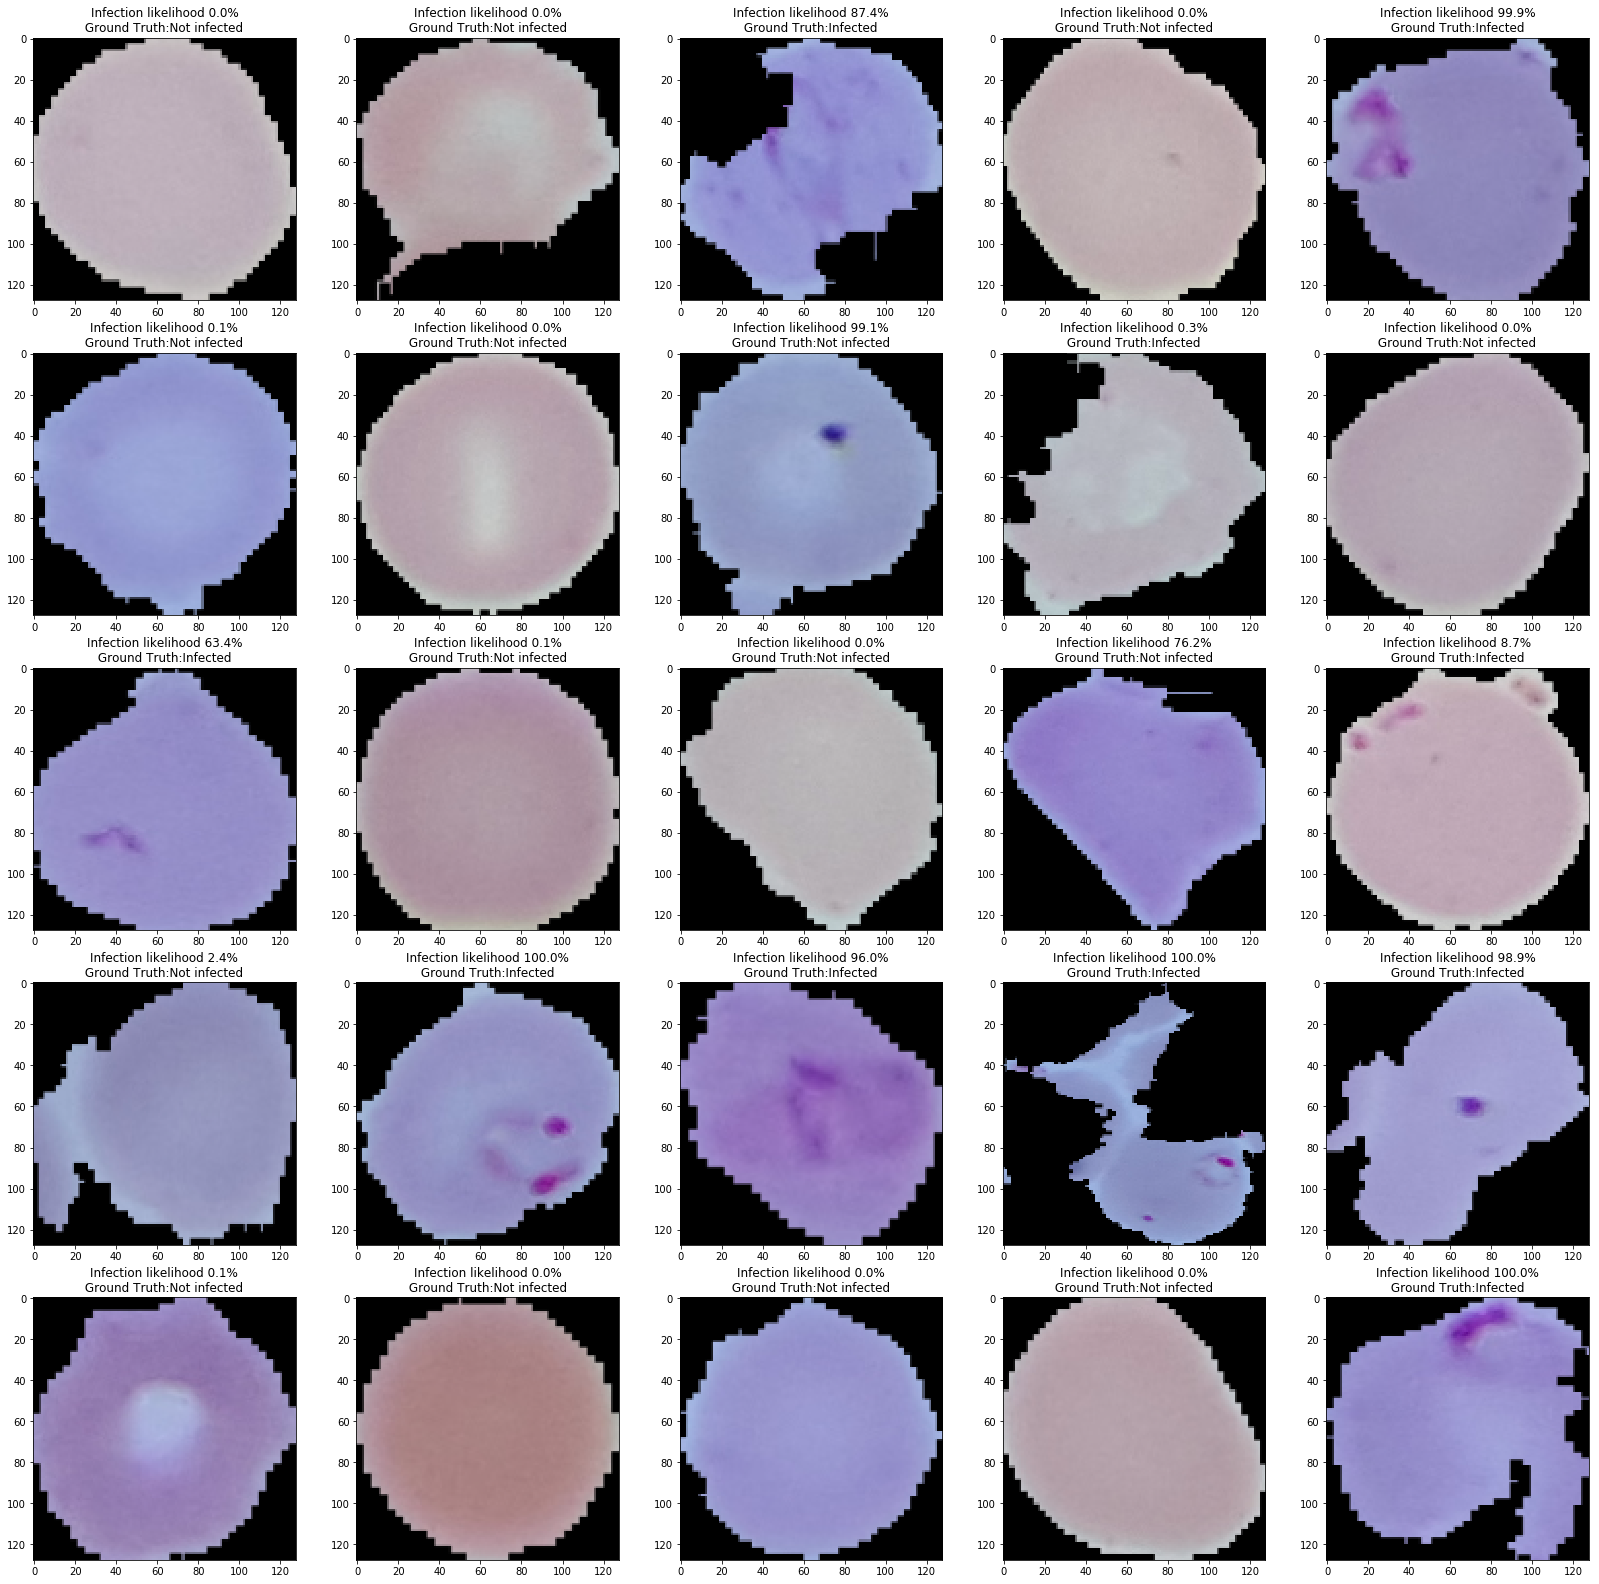

In [10]:
predictions = model.predict(X_test)

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['Not infected', 'Infected']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    #plt.title('Infection likelihood {:.2%}\n'.format(float(predictions[i])))
    
plt.show()